# Figure 1:
## Plot keplerian, radial epicyclic, and vertical epicyclic frequencies for a = -1, 0, 0.5, 0.998


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

## a

In [2]:
a_values = [-1, 0, 0.5, 0.998]

## r values for different a

In [43]:
def r(a):
    r = []
    if a == 0:
        for i in np.arange(6, 20, 0.05):
            rlimit = 6
            r.append(i)
    if a == 0.5:
        for i in np.arange(4, 20, 0.05):
            r.append(i)
    if a == 0.998:
        for i in np.arange(1, 20, 0.05):
            r.append(i)
    if a == -1:
        for i in np.arange(9, 20, 0.05):
            r.append(i)
    return r

## Keplerian

In [24]:
def kep(a, r):
    kep = []
    for i in range(len(r)):
        kep.append(1/(r[i]**(3/2) + a)) 
    return kep

## Radial Epicyclic

In [25]:
def rad(a, kep, r):
    rad = []
    for i in range(len(r)):
        rad.append((kep[i]**2 * (1 - 6/r[i] + 8*a/(r[i]**(3/2)) - 3*a**2/(r[i]**2)))**(1/2))
    return rad

## Vertical Epicyclic

In [26]:
def vert(a, kep, r):
    vert = []
    for i in range(len(r)):
        vert.append((kep[i]**2 * (1 - 4*a/(r[i]**(3/2)) + 3*a**2/(r[i]**2)))**(1/2))
    return vert

## Figure 1

/Users/celiatandon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Text(0.14, 0.42, '$\\kappa$')

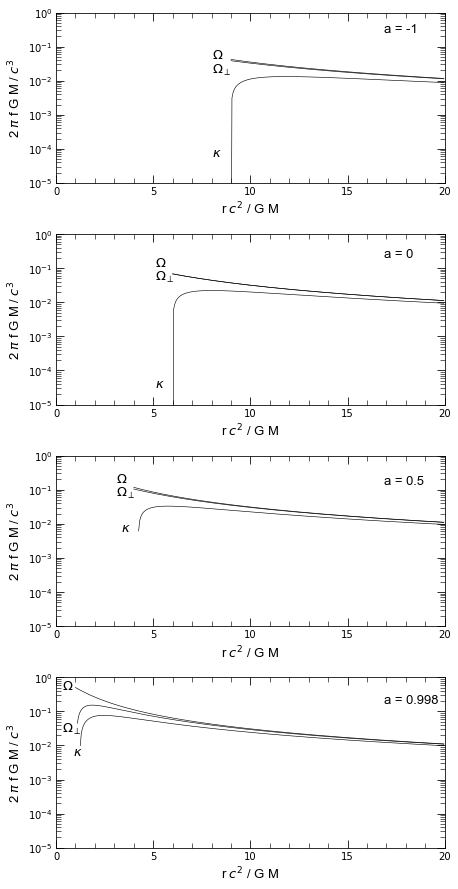

In [67]:
fig, axs = plt.subplots(4)
fig.subplots_adjust(left = 0.1, bottom = 0.1, right = 1, top = 3, wspace = 0.2, hspace = 0.3)
axis_font = {'fontname':'Arial', 'size':'13'}

for i in range(len(a_values)):
    a = a_values[i]
    radius = r(a)
    keplerian = kep(a, radius)
    radial = rad(a, keplerian, radius)
    vertical = vert(a, keplerian, radius)

    axs[i].plot(radius, keplerian, 'k', linewidth = 0.6)
    axs[i].plot(radius, radial, 'k', linewidth = 0.6)
    axs[i].plot(radius, vertical, 'k', linewidth = 0.6)
    
for ax in axs.flat:
    ax.set_xlabel('r $c^2$ / G M', **axis_font)
    ax.set_ylabel('2 $\pi$ f G M / $c^3$', **axis_font)
    ax.set_yscale("log")
    ax.axis([0,20,10**-5,1])
    ax.set_xticks(ticks = np.arange(0, 20.1, 5))
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both',  which = 'major', direction = 'in', length = 8, labelsize = 10, bottom = True, top = True, left = True, right = True, labelbottom = True)
    ax.tick_params(axis = 'both',  which = 'minor', direction = 'in', length = 5, labelsize = 10, bottom = True, top = True, left = True, right = True, labelbottom = True)

fig.text(.86, 2.93, "a = -1", **axis_font)
fig.text(.86, 2.15, "a = 0", **axis_font)
fig.text(.86, 1.36, "a = 0.5",  **axis_font)
fig.text(.86, .6, "a = 0.998", **axis_font)

fig.text(.46, 2.84, "$\Omega$", **axis_font)
fig.text(.33, 2.12, "$\Omega$", **axis_font)
fig.text(.24, 1.37, "$\Omega$", **axis_font)
fig.text(.115, .65, "$\Omega$", **axis_font)


fig.text(.46, 2.79, "$\Omega_\perp$", **axis_font)
fig.text(.33, 2.07, "$\Omega_\perp$", **axis_font)
fig.text(.24, 1.32, "$\Omega_\perp$", **axis_font)
fig.text(.115, .5, "$\Omega_\perp$", **axis_font)

fig.text(.46, 2.5, "$\kappa$", **axis_font)
fig.text(.33, 1.7, "$\kappa$", **axis_font)
fig.text(.25, 1.2, "$\kappa$", **axis_font)
fig.text(.14, .42, "$\kappa$", **axis_font)
